In [ ]:
'''
        ***** Image Classification with TensorFlow for Cat/Dog Use case********

In this notebook, 
A. Used local data of Cat/Dog image to build Image classification model using TensorFlow library (CNN)
B. For referencing Image data, there are different ways of providing a reference of Image data such as 
    a. via 'flow_from_directory' api  - This is used when you have two different folder for Train and Validation images
    b. via 'flow_from_dataframe' api - This is used when u have single folder and u load the images into dataframe and then split
        into Train and Validation image

C. In this notebook implementation, 
    a. Image Data is downloaded from online source and then 'flow_from_directory' api is used to load the data 
       from local directory and used it in model fitting
    b. For model testing, there are different implementation provided into this notebook 
        1. Load Multiple Test Images via 'flow_from_dataframe' api and then perform prediction
        2. Load multiple test images via 'flow_from_directory' api and then perform prediction
        3. Load multiple test imags via iterating local dir and then perform prediction
        4. Load single image and then perform prediction
    
C. Save the model and model weight into file and used these files for further prediction on Test Images
   
'''

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [2]:
# Part 1 - Downlaod Image data from online source

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
# Part - 2 - Define source dir for Train and validation image data

print(PATH)
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

C:\Users\618757\.keras\datasets\cats_and_dogs_filtered


In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:::', num_cats_tr)
print('total training dog images:', num_dogs_tr)

total training cat images::: 1000
total training dog images: 1000


In [5]:
# Part 3 - Create Image Data Generator for Train and validation set which will be used in model building

batch_size = 128
epochs = 5
IMG_HEIGHT = 64
IMG_WIDTH = 64

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


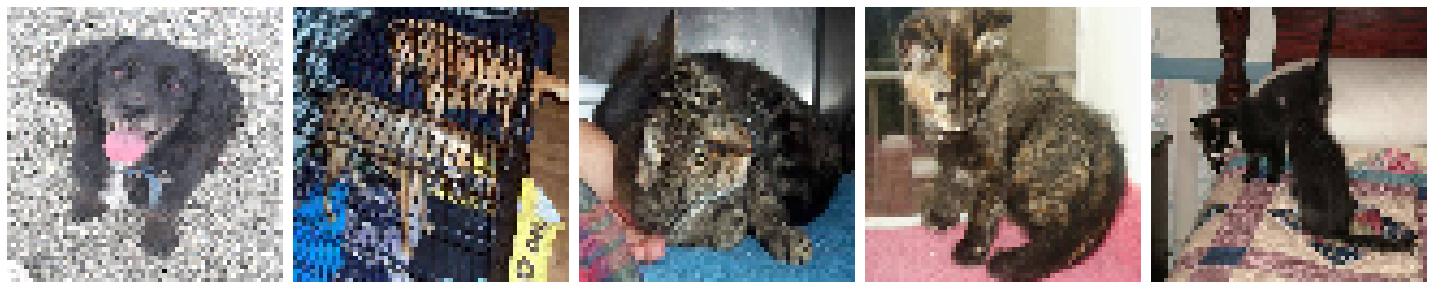

In [14]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

In [15]:
# Part 4 - Initialising the CNN and compiling the model

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
__________________________________________

In [16]:
# Part-5 Fitting the CNN to the images. Train the Model on Training images. For validation, used Test Images

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/5
15/15 [==============================] - 10s 665ms/step - loss: 0.7088 - acc: 0.5203 - val_loss: 0.6876 - val_acc: 0.5703
Epoch 2/5
15/15 [==============================] - 9s 606ms/step - loss: 0.6799 - acc: 0.5817 - val_loss: 0.6730 - val_acc: 0.5402
Epoch 3/5
15/15 [==============================] - 9s 602ms/step - loss: 0.6426 - acc: 0.6389 - val_loss: 0.6289 - val_acc: 0.6685
Epoch 4/5
15/15 [==============================] - 9s 595ms/step - loss: 0.5960 - acc: 0.6859 - val_loss: 0.6151 - val_acc: 0.6763
Epoch 5/5
15/15 [==============================] - 8s 560ms/step - loss: 0.5574 - acc: 0.7052 - val_loss: 0.5771 - val_acc: 0.6964


In [17]:
# Part 6- save model file and model weights 
model.save("Image_classifier_model_flow_from_dataframe_onlinedata.model1")
model.save_weights("Image_classifier_weight_flow_from_dataframe_onlinedata.model2")

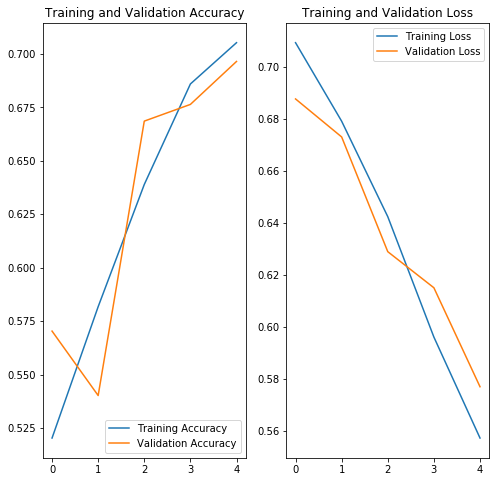

In [18]:
# Part 7- Evaluate Model Performance 

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# Part - 8 - Unzip Test Image dataset

import zipfile
with zipfile.ZipFile('sub-train-image.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [6]:
# Part 9 - Load the Model file which is created on Part - 7 
model = load_model("Image_classifier_model_flow_from_dataframe_onlinedata.model1")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Part 10- This is an example for loadign single image and perform prediction on it

test_image = image.load_img('test-subset/test-subset/115.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image/255

print(test_image.shape)

result = model.predict(test_image)
predict_proba = model.predict_proba(test_image)
prediction_result = np.argmax(result[0])

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(result , " : ", prediction)

(1, 64, 64, 3)
[[0.69629025]]  :  cat


In [ ]:
# Part 11- This is an example for loadign multiple images from local dir and perform prediction on all images

test_datagen = ImageDataGenerator(rescale = 1./255)

'''
test_set = test_datagen.flow_from_directory('test-subset/test-subset',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

test_set = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

'''

test_set = test_datagen.flow_from_directory(directory=validation_dir, target_size = (64, 64),
                                            batch_size = 32, class_mode = 'binary')

sample_training_images, _ = next(test_set)

plt.figure(figsize=(12, 12))
for i in range(0, 1):
    plt.subplot(5, 3, i+1)
    for X_batch in sample_training_images:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
# plt.show()

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# plotImages(sample_training_images[:5])

total_validate = 502
batch_size = 32

predict = model.predict_generator(test_set, steps=np.ceil(total_validate/32))
print(predict.shape)

test_labels = np.array(np.zeros(502))
print(test_labels.shape)
my_data = (test_set, test_labels)
# test_loss, test_acc = model.evaluate(my_data)
# print(test_acc)

Found 0 images belonging to 0 classes.


In [40]:
# Part 12- This is an example for loadign multiple images from local dir via dataframe

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

test_filenames = os.listdir("test-subset/test-subset")
test_df = pd.DataFrame({
    'filename': test_filenames
})

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test-subset/test-subset", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64, 64),
    batch_size=32,
    shuffle=False
)

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/32))
print(predict[0][0])

predict = model.predict(test_generator)
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

predict = np.argmax(predict, axis=-1)

'''
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch in test_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()
'''

Found 502 validated image filenames.
[[0.5199646 ]
 [0.20278987]
 [0.27636623]
 [0.5112291 ]
 [0.27063477]
 [0.30953878]
 [0.21002537]
 [0.69150996]
 [0.57316494]
 [0.39747053]
 [0.57204926]
 [0.74299645]
 [0.13989198]
 [0.9140742 ]
 [0.5204104 ]
 [0.2291115 ]
 [0.8296497 ]
 [0.15303934]
 [0.69629025]
 [0.3171605 ]
 [0.36662284]
 [0.73796797]
 [0.31140286]
 [0.8076743 ]
 [0.4638271 ]
 [0.41828674]
 [0.23263896]
 [0.2510008 ]
 [0.16072878]
 [0.3307403 ]
 [0.24254662]
 [0.68359876]
 [0.48025054]
 [0.5368866 ]
 [0.38557026]
 [0.09967184]
 [0.84661967]
 [0.41752732]
 [0.16209877]
 [0.19168288]
 [0.22692835]
 [0.28518927]
 [0.6382209 ]
 [0.37055108]
 [0.85693645]
 [0.21251056]
 [0.39567629]
 [0.23034051]
 [0.22750676]
 [0.87176967]
 [0.51615036]
 [0.5221368 ]
 [0.9083641 ]
 [0.51022464]
 [0.15054277]
 [0.33717155]
 [0.6322826 ]
 [0.31874287]
 [0.5363154 ]
 [0.60789037]
 [0.49632937]
 [0.3349992 ]
 [0.4568323 ]
 [0.3154831 ]
 [0.32579505]
 [0.792511  ]
 [0.29526007]
 [0.19147748]
 [0.6562193

'\nplt.figure(figsize=(12, 12))\nfor i in range(0, 15):\n    plt.subplot(5, 3, i+1)\n    for X_batch in test_generator:\n        image = X_batch[0]\n        plt.imshow(image)\n        break\nplt.tight_layout()\nplt.show()\n'

In [38]:
# Part 13- This is an example for loadign multiple images from local dir using 'image' library 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

train_dir = "test-subset/test-subset"
# path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
test_image = []
counter = 0
def create_test_data(path, counter):
    for p in os.listdir(path):
        img = image.load_img('test-subset/test-subset/'+ p, target_size = (64, 64))
        img = image.img_to_array(img)
        img = img/255
        test_image.append(img)
        
        # counter = counter + 1  
        # img = np.expand_dims(img, axis = 0)
        # print(model.predict(img))
            

create_test_data(train_dir, counter)
test_image=np.array(test_image)
# test_image=test_image.reshape((test_image.shape)[0],(test_image.shape)[1],(test_image.shape)[2],1)

predictions = model.predict(test_image)
predictions=np.round(predictions,decimals=5)
print('final predictions')
print(predictions)

final predictions
[[0.51996]
 [0.20279]
 [0.27637]
 [0.51123]
 [0.27063]
 [0.30954]
 [0.21003]
 [0.69151]
 [0.57316]
 [0.39747]]
